In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [3]:
df = pd.read_csv('../data/processed/trainAbandonoE.csv', index_col = 'id')
df_ml = df.copy()
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int64  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   satisfaccion_entorno      1470 non-null   object 
 8   implicacion               1470 non-null   object 
 9   nivel_laboral             1470 non-null   int64  
 10  puesto                    1470 non-null   object 
 11  satisfaccion_trabajo      1470 non-null   object 
 12  estado_civil              1470 non-null   object 
 13  salario_mes               1470 non-null   int64  
 14  num_empr

# Preparing data for Modeling


## Transform categorical variables into numerical variables.
Categorical

In [4]:
cat = df_ml.select_dtypes('O')
cat

,viajes,departamento,educacion,carrera,satisfaccion_entorno,implicacion,puesto,satisfaccion_trabajo,estado_civil,horas_extra,evaluacion,satisfaccion_companeros
id,,,,,,,,,,,,
1,Travel_Rarely,Sales,Universitaria,Life Sciences,Media,Alta,Sales Executive,Alta,Single,Yes,Alta,Baja
2,Travel_Frequently,Research & Development,Secundaria,Life Sciences,Alta,Media,Research Scientist,Media,Married,No,Muy_Alta,Muy_Alta
4,Travel_Rarely,Research & Development,Secundaria,Other,Muy_Alta,Media,Laboratory Technician,Media,Single,Yes,Alta,Media
5,Travel_Frequently,Research & Development,Universitaria,Life Sciences,Muy_Alta,Alta,Research Scientist,Alta,Married,Yes,Alta,Alta
7,Travel_Rarely,Research & Development,Universitaria,Medical,Baja,Alta,Laboratory Technician,Alta,Married,No,Alta,Muy_Alta
...,...,...,...,...,...,...,...,...,...,...,...,...
2061,Travel_Frequently,Research & Development,Master,Medical,Alta,Muy_Alta,Laboratory Technician,Muy_Alta,Married,No,Alta,Alta
2062,Travel_Rarely,Research & Development,Secundaria,Medical,Muy_Alta,Media,Healthcare Representative,Media,Married,No,Alta,Baja
2064,Travel_Rarely,Research & Development,Master,Life Sciences,Media,Muy_Alta,Manufacturing Director,Muy_Alta,Married,Yes,Muy_Alta,Media


In [5]:
#train
ohe = OneHotEncoder(sparse_output = False)
ohe.fit(cat)

OneHotEncoder(sparse_output=False)

In [6]:
# Apply
cat_ohe = ohe.transform(cat)
cat_ohe

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [9]:
# Put the names
cat_ohe = pd.DataFrame(
    cat_ohe,
    columns = ohe.get_feature_names_out(input_features = cat.columns)
).reset_index(drop = True)
cat_ohe

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,estado_civil_Married,estado_civil_Single,horas_extra_No,horas_extra_Yes,evaluacion_Alta,evaluacion_Muy_Alta,satisfaccion_companeros_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Concatenate ``cat`` and ``num`` variables

Select numerical variables

In [10]:
num = df.select_dtypes('number').reset_index(drop = False)
num

,id,edad,abandono,distancia_casa,nivel_laboral,salario_mes,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_anual,impacto_abandono
0,1,41,1,1,2,5993,8,11,0,8,0,6,0,5,71916,14670.864
1,2,49,0,8,2,5130,1,23,1,10,3,10,1,7,61560,12558.240
2,4,37,1,2,1,2090,6,15,0,7,3,0,0,0,25080,4037.880
3,5,33,0,3,1,2909,1,11,0,8,3,8,3,0,34908,6876.876
4,7,27,0,2,1,3468,9,12,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,36,0,23,2,2571,4,17,1,17,3,5,0,3,30852,6077.844
1466,2062,39,0,6,3,9991,4,15,1,9,5,7,1,7,119892,25177.320
1467,2064,27,0,4,2,6142,1,20,1,6,0,6,0,3,73704,15035.616
1468,2065,49,0,2,2,5390,2,14,0,17,3,9,0,8,64680,13194.720


Concatenating all variables in the final DataFrame

In [11]:
df_ml = pd.concat([cat_ohe, num], axis = 1)
df_ml

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_anual,impacto_abandono
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8,11,0,8,0,6,0,5,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,23,1,10,3,10,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,6,15,0,7,3,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,11,0,8,3,8,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,9,12,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4,17,1,17,3,5,0,3,30852,6077.844
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,4,15,1,9,5,7,1,7,119892,25177.320
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,20,1,6,0,6,0,3,73704,15035.616
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,14,0,17,3,9,0,8,64680,13194.720


# Modeling design
Separating predictable & target variables


In [12]:
x = df_ml.drop(columns = 'abandono') # predictor
y = df_ml['abandono'] # target

Separating train & test


In [13]:
from sklearn.model_selection import train_test_split

train_x, test_x,\
train_y, test_y = train_test_split(x, y, test_size = 0.3)

### Model Training **_(train)_**

In [15]:
from sklearn.tree import DecisionTreeClassifier

ac = DecisionTreeClassifier(max_depth = 4)

ac.fit(train_x, train_y) # train

DecisionTreeClassifier(max_depth=4)

### Prediction and Validation **_(test)_**

Prediction

In [16]:
pred = ac.predict_proba(test_x)[:, 1]
pred[:20]

array([0.        , 0.04891304, 0.10687023, 0.05217391, 0.10687023,
       0.05217391, 0.33898305, 0.27083333, 0.10687023, 0.04891304,
       0.10687023, 0.10687023, 0.10687023, 0.04891304, 0.04891304,
       0.04891304, 0.45454545, 0.05217391, 0.10687023, 0.125     ])

Validation

In [18]:
from sklearn.metrics import roc_auc_score
# auc < 0.7 -> the model isn't very effective
# 0.7 <= auc < 0.8 -> practical and effective
# 0.8 <= auc <= 1 -> excelent
roc_auc_score(test_y, pred)

0.77344989185292

### Interpretation

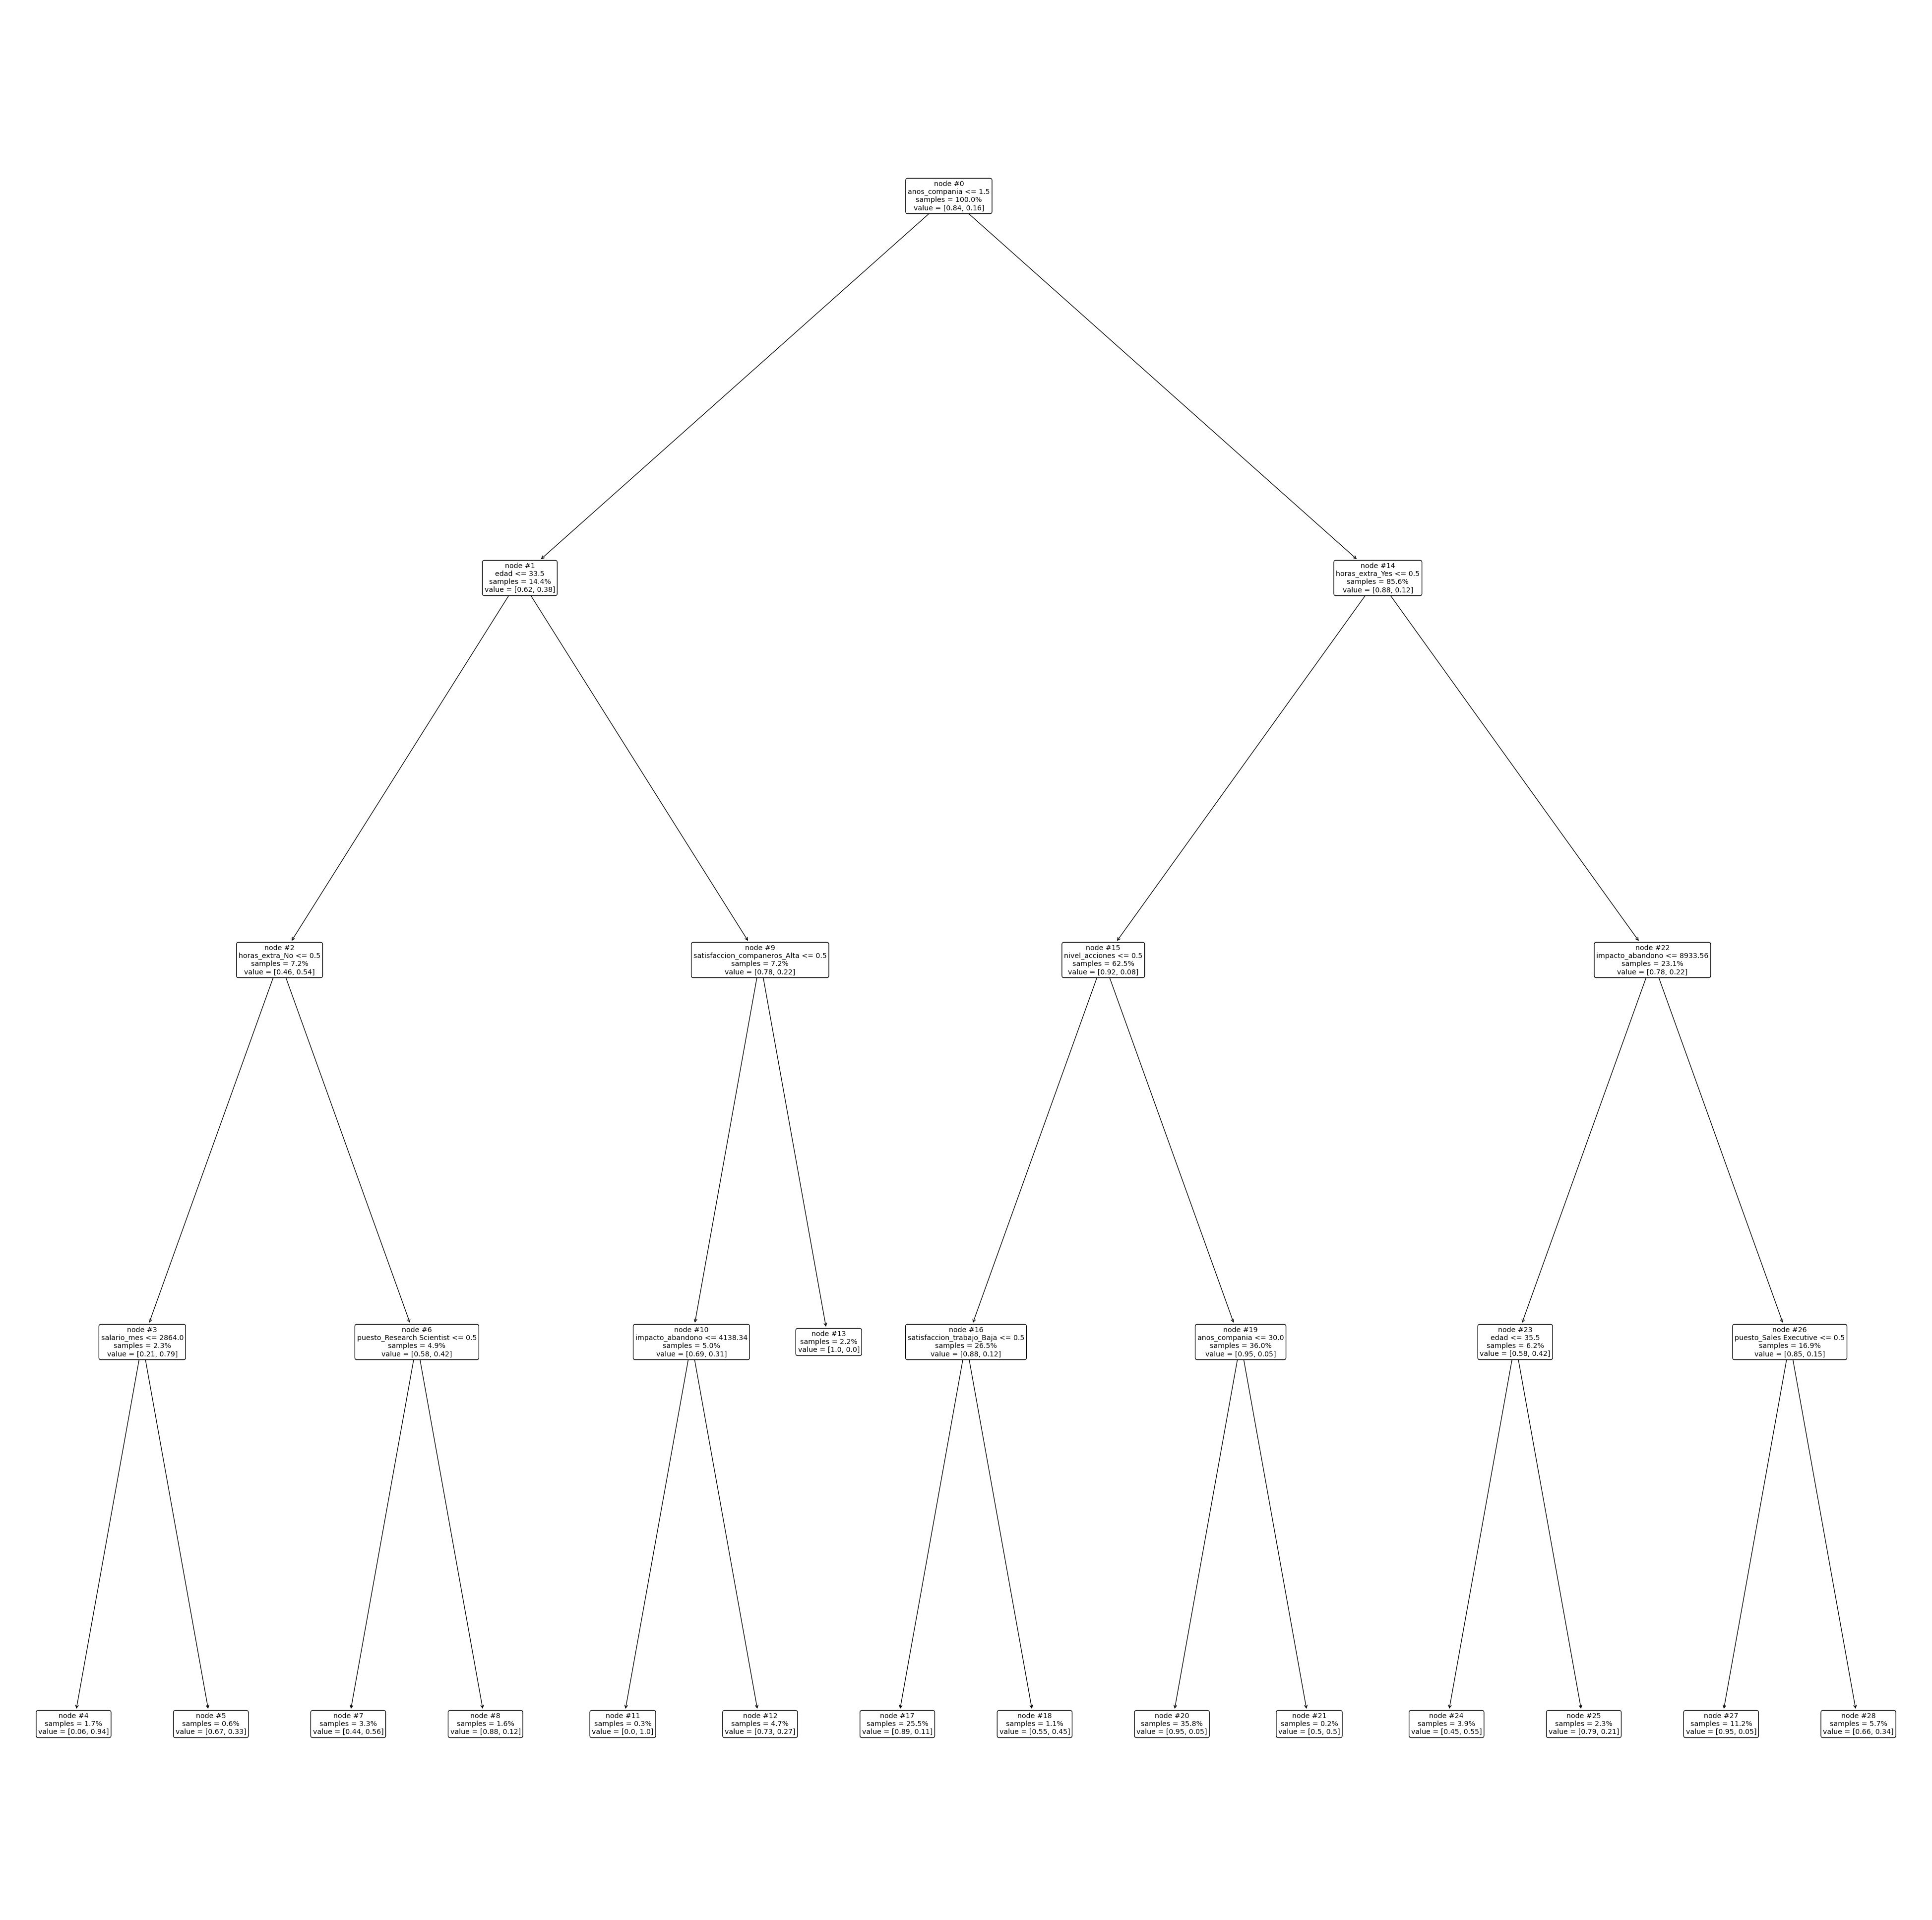

In [26]:
from sklearn.tree import plot_tree

plt.figure(figsize = (50, 50))
plot_tree(
    ac,
    feature_names = test_x.columns,
    impurity = False,
    node_ids = True,
    proportion = True,
    rounded = True,
    precision = 2
);

<AxesSubplot: >

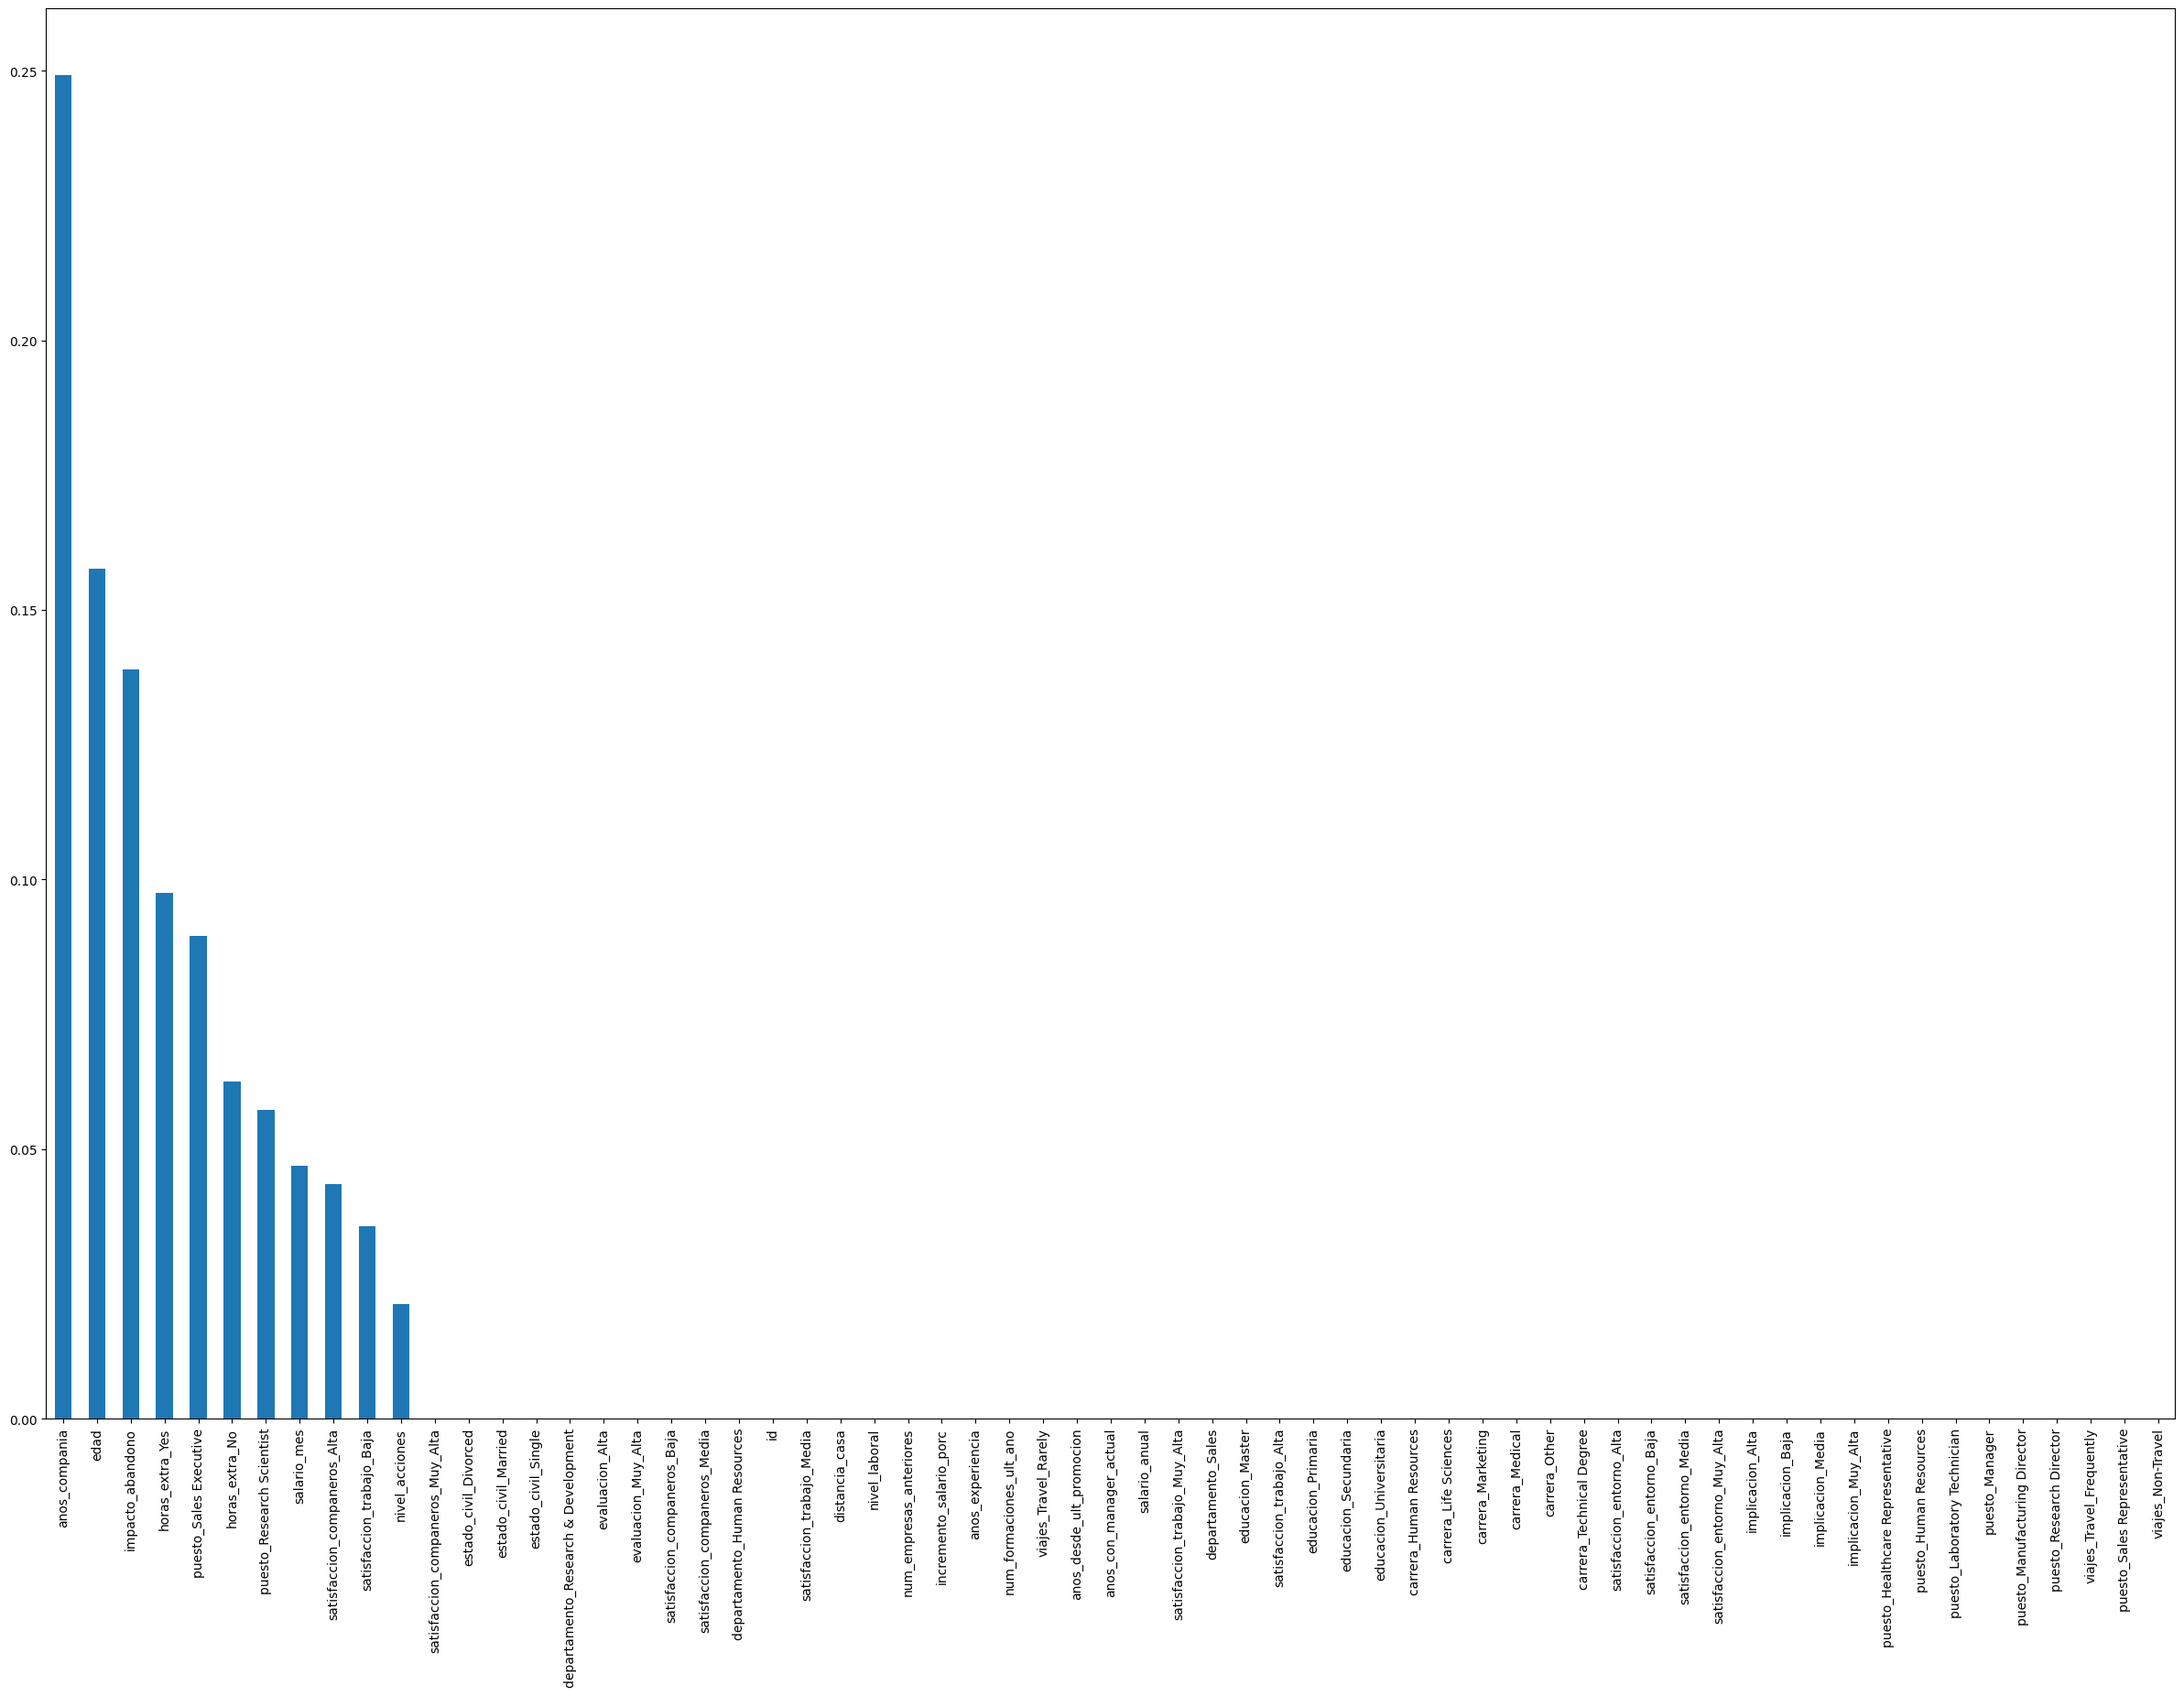

In [27]:
pd.Series(
    ac.feature_importances_,
    index = test_x.columns
).sort_values(ascending = False)\
.plot(kind = 'bar',figsize= (30, 20))

### Exploting

In [28]:
df['abandono_scoring'] = ac.predict_proba(
    df_ml.drop(columns = 'abandono')
)[:,1]
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_anual,impacto_abandono,abandono_scoring
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,0.338983
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.048913
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,1.000000
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,0.550000
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.048913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,1,17,3,5,0,3,30852,6077.844,0.048913
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Baja,1,9,5,7,1,7,119892,25177.320,0.048913
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Media,1,6,0,6,0,3,73704,15035.616,0.052174


In [29]:
df.sort_values(
    by = 'abandono_scoring',
    ascending = False
)[0:10]

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_anual,impacto_abandono,abandono_scoring
id,,,,,,,,,,,,,,,,,,,,,
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,1.000000
1210,41,1,Non-Travel,Research & Development,5,Secundaria,Life Sciences,Baja,Media,1,...,Baja,1,5,2,1,0,0,25284,4070.724,1.000000
1569,35,1,Travel_Rarely,Research & Development,2,Universitaria,Life Sciences,Baja,Alta,1,...,Muy_Alta,1,1,2,1,0,0,24888,4006.968,1.000000
934,34,0,Travel_Rarely,Research & Development,10,Universitaria,Life Sciences,Media,Alta,1,...,Media,2,1,3,1,1,0,24096,3879.456,1.000000
701,20,1,Travel_Rarely,Research & Development,10,Universitaria,Medical,Muy_Alta,Alta,1,...,Muy_Alta,0,1,5,1,1,1,12108,1949.388,0.944444
1868,29,1,Travel_Frequently,Research & Development,24,Secundaria,Life Sciences,Muy_Alta,Media,1,...,Media,0,1,3,1,1,0,29268,4712.148,0.944444
1974,31,0,Travel_Rarely,Research & Development,2,Primaria,Medical,Muy_Alta,Baja,1,...,Alta,3,1,4,1,0,0,13548,2181.228,0.944444
514,30,1,Travel_Frequently,Research & Development,4,Universitaria,Technical Degree,Alta,Alta,1,...,Alta,0,3,4,1,0,0,27420,4414.620,0.944444
1248,19,1,Non-Travel,Research & Development,10,Secundaria,Medical,Baja,Media,1,...,Media,0,1,2,1,0,0,22308,3591.588,0.944444


In [30]:
df.to_excel('../data/processed/final_processed_employee.xlsx')